# 머신러닝
       
       
5주 2강: Visualization Intermediates
<br/><br/>

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# Today
지난 시간에는 가장 기본적인 그래프를 그리는 법을 공부했습니다.
이번 시간에는 조금 더 "예쁘게" 그림을 그리는 법들에 대해서 알아봅시다.

- Legends
- Colorbars
- Subplot
- Text / Annotation
- Ticks
- Seaborn

# Customizing Plot Legends

지난 시간에 간단하게 legend (범례)를 그리는 법을 공부했습니다.
이번 시간에는 legends를 꾸미는 방법에 대해서 이야기해 보겠습니다.

``plt.legend()``를 통해 가장 기본적인 legend를 생성할 수 있습니다.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

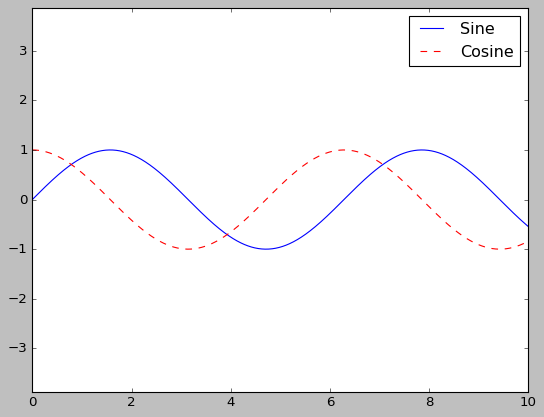

In [13]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

기본 legend도 정보는 충분히 주지만, 테두리가 공간을 차지하는 것이 보기 좋지 않습니다. 
위치도 왼쪽 위가 더 잘 어울릴 것 같네요.

아래처럼 하시면 됩니다.

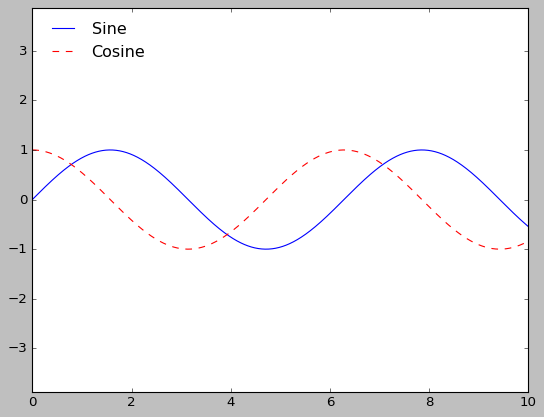

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

``ncol``을 통해서 legend의 column 수를 조정할 수도 있습니다.

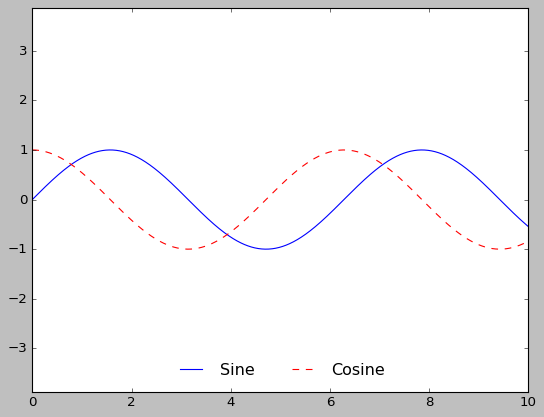

In [16]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

``fancybox`` 를 통해서 끝이 둥근 테두리를 쓸 수도 있고, 박스에 음영을 줄 수도 있습니다. 또한 alpha를 조정해서 테두리의 투명도도 조절할 수 있습니다.

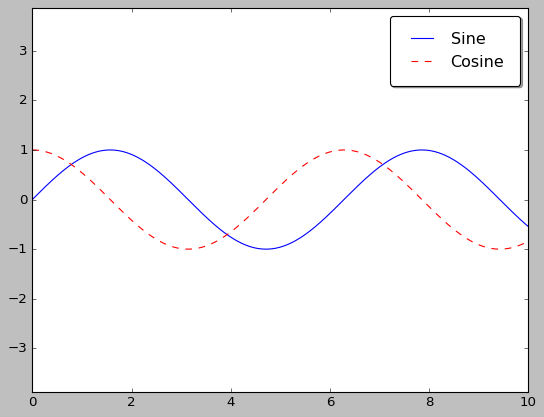

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

``help(plt.legend)`` 로 docstring을 읽어보시면 더 많은 기능을 확인하실 수 있습니다.

## Choosing Elements for the Legend

legends는 기본적으로 plot에 있는 모든 label이 있는 element에 대해서 그려집니다.

하지만 전체가 아닌 일부의 label만 보고 싶다면 어떻게 해야 할까요?

plot의 return object를 활용해서 legend를 조정해줄 수 있습니다. 

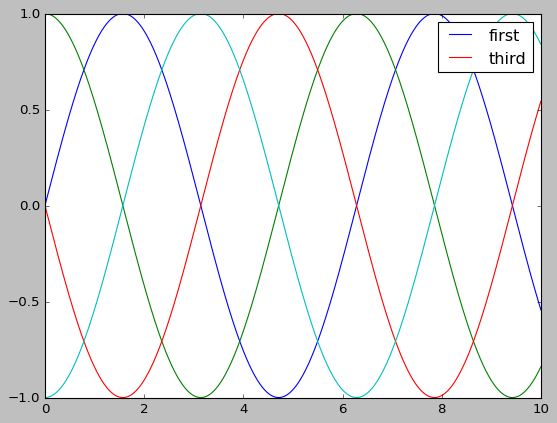

In [17]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
# 이렇게 되면 y는 x값에 0 pi, 0.5 pi, 1 pi, 1.5 pi 가 더해진 sin 함수 4가지가 됩니다
lines = plt.plot(x, y)
# 동시에 4가지의 plot을 그립니다.

# 앞의 2개만 legend를 붙여줍시다.
plt.legend(lines[::2], ['first', 'third'])

혹은 아래처럼 개별 plot에 대해서 label을 붙이는 방식도 가능합니다.

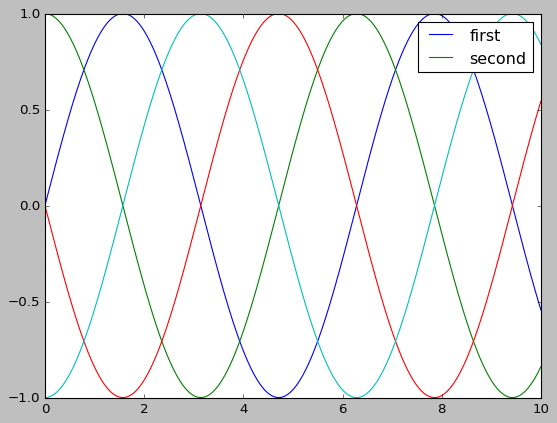

In [20]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

legend는 기본적으로 label attribute가 없는 경우에는 표시되지 않습니다.

## Legend for Size of Points

몇몇 경우에는 기본적으로 제공하는 legend 기능들만으로 표현하기 힘든 경우가 있습니다.

예를 들어서 점의 크기가 중요한 정보를 나타낼 때, 각 크기가 어느정도 값을 나타내는지를 legend로 나타내고 싶다면 어떻게 해야할까요? 위의 방식으로는 어렵겠죠.

위처럼 조금 복잡한 방식의 legend를 만드는 방법에 대한 예시를 하나 공부해봅시다. 

점의 크기는 캘리포니아 각 도시의 넓이를 나타내고, 색상은 인구를 나타내게 해 봅시다.

Text(0.5, 1.0, 'California Cities: Area and Population')

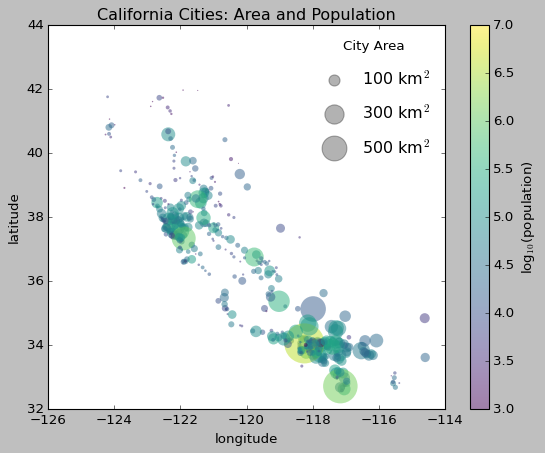

In [31]:
import pandas as pd
cities = pd.read_csv('../data/california_cities.csv')
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd'] # 위도와 경도를 추출합니다.
population, area = cities['population_total'], cities['area_total_km2'] # 인구와 넓이를 추출합니다.
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) # 여기까지는 꽤나 직관적입니다.
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')  # 범례 만들기
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')

기본적으로는 maplotlib의 legend는 그래프에 실제로 존재하는 object를 reference로 가지고 있어야 합니다. 이 경우에는 회색의 점은 plot에 없지만, empty list를 통해서 존재하는 것 처럼 만드는 트릭을 써 주었습니다. 보통 label이 있는 경우에만 legend가 표시되니 위에 그린 점들은 legend에 나타나지 않습니다. 

이런 방식으로 label을 위한 가짜 plot을 한 번 하는 트릭이 다양한 경우에 문제를 해결하는데 도움을 줍니다.

## Multiple Legends

한 axes에 대해서 여러 개의 legends를 만들고 싶다면 어떻게 해야할까요? 
사실 이것도 matplotlib에서는 쉬운 일이 아닙니다. 기본적 ``legend`` object의 경우 한 axes당 한 개만 만들 수 있습니다. 
그래서 ``plt.legend()`` 나 ``ax.legend()``을 통해 두 번째 legend를 설정하면 첫 번째 legend는 지워집니다.

그래서 이 경우에는 lower-level ``ax.add_artist()`` method를 통해 두 번째 legends를 수동으로 입력해 주어야 합니다.

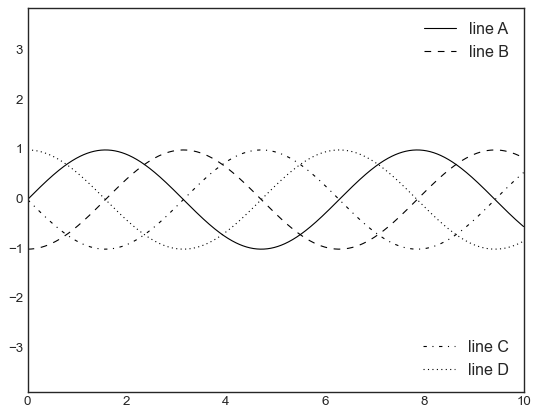

In [59]:
from matplotlib.legend import Legend

fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')
# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)
# Create the second legend and add the artist manually.
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False) # legend object 생성
ax.add_artist(leg); # add_artist로 두 번째 legends 생성

``ax.legend()``의 실제 소스코드를 들여다보면, ``Legend`` artist를 만들고 ``legend_`` attribute에 저장한 후 plot이 그려질 때 artist object를 그려주게 됩니다. 

# Customizing Colorbars

지금까지는 legends를 통해서 "점"들에 대한 정보를 보여주는 방법들에 대해서 이야기 해 보았습니다.

연속적인 color를 다룰때는 legend로 모든 정보를 표시하는 것이 보통 불가능합니다.
이 경우에는 별도의 axes를 분리해서 colorbar를 만들 수 있습니다. (중요: <u>colorbar를 만들면, 이 colorbar는 원래의 axes와 다른 새 axes가 만들어집니다</u>).

``plt.colorbar``를 통해 가장 기본적인 colorbar를 만들 수 있습니다.

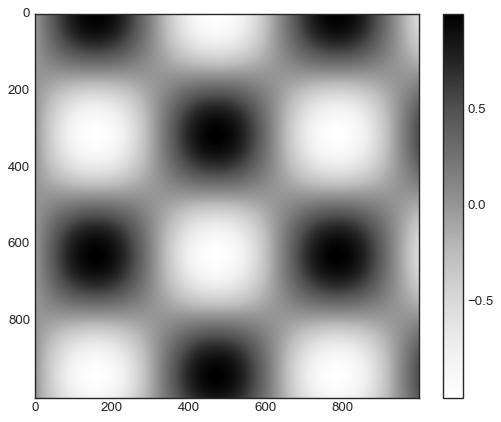

In [61]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

지금부터는 이러한 몇 가지 상황에서 유용하게 다룰 수 있는 colorbar에 대한 트릭을 같이 공부해봅시다.

## Customizing Colorbars

지난시간에 말씀드린 대로 colormap은 ``cmap`` argument 를 plottig function에 입력하는 것으로 사용할 수 있습니다.

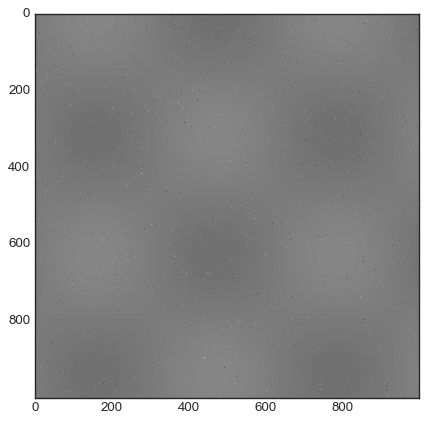

In [60]:
plt.imshow(I, cmap='gray')

jupyter에서 ``plt.cm`` namespace의 colormap들을 확인해 보세요. 

```
plt.cm.<TAB>
```

### Choosing the Colormap

어떤 color를 선택하고 어떤 colormap을 고르는 것이 좋은 방법인지를 알아보는 것은 일단 이 강의의 시간 제한상 다루기 힘들 것이라 생각합니다.

혹시 그런 것들이 궁금하시면 이 논문을 한 번 읽어보세요: ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).

하지만 대략적으로 colormap을 아래와 같은 카테고리로 나눌 수 있다는 것은 기억해 두어야 합니다. 

- *Sequential colormaps*: 연속되는 한 가지 계통 색상으로 구성된 colormap (e.g., ``binary`` or ``viridis``).
- *Divergent colormaps*: positive 와 negative를 구분하는 등을 위해 사용되는 2가지 컬러를 사용하는 colormap (e.g., ``RdBu`` or ``PuOr``).
- *Qualitative colormaps*: 여러 색을 섞은 colormap (e.g., ``rainbow`` or ``jet``).

Matplotlib 2.0이전에는 `jet` colormap 이 기본으로 사용되었습니다. 대표적인 Qualitative colormap인데, 사실 Qualitative colormap은 화려하긴 하지만 시각화에서 좋은 선택이 아닌 경우가 많습니다. 왜냐 하면 색 만으로 경향성을 파악하기 쉽지 않은 경우가 많기 때문입니다. 특히나 흑백으로 변환하면 그 단점은 더 크게 부각됩니다. 아래의 예를 봅시다.

In [35]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))   
    # convert RGBA to perceived grayscale luminance. ref. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))   
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

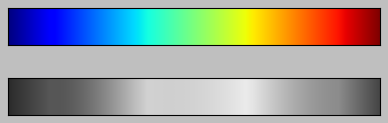

In [36]:
view_colormap('jet')

양 극단보다 가운데의 밝기가 더 높은 것을 알 수 있습니다. 즉, 이런 경우에 시각화에 왜곡을 가져올 가능성이 있습니다.

``viridis``는 matplotlib 2.0 이후부터의 기본값입니다. 이 colormap은 값에 따라서 일관된 밝기 변화를 유지합니다. 

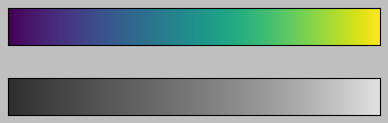

In [37]:
view_colormap('viridis')

무지개같은 화려함을 원한다면 ``cubehelix`` 같은 colormap도 동일한 이유로 좋은 선택이 될 수 있습니다. 

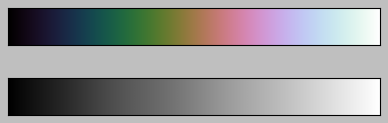

In [38]:
view_colormap('cubehelix')

평균을 기준으로 위아래를 나누거나, 양의 값과 음의 값을 비교하거나 하는 경우에는 Divergent colormap이 적당합니다. 예를 들어서 ``RdBu`` (*Red-Blue*) 같은 colormap이죠. 하지만 grayscale로 변환한다면 그 정보를 잃어버리는 것에 유의하셔야 합니다.

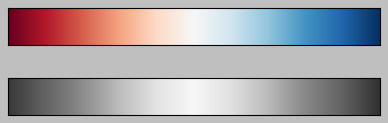

In [39]:
view_colormap('RdBu')

### Color limits and extensions

Matplotlib은 다양한 colorbar customization 기능을 지원합니다
지난 시간에 말씀드렸듯 colorbar 자체도 별도의 ``plt.Axes`` obejct입니다. 즉, axes에 사용되는 여러가지 setting들을 colorbar에도 그대로 사용할 수 있습니다. 그 덕분에 자유도가 높습니다.

예를 들어서 colorbar의 구간을 줄이고, 그 구간을 넘어가는 경우 어떻게 처리할지를 ``extend`` property를 통해 지정할 수 있습니다. 아래와 같이 사용하면 됩니다.

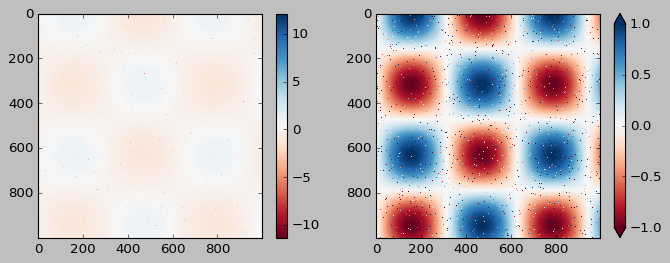

In [40]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

왼쪽 그림을 보면 노이즈 덕분에 원 데이터가 제대로 보이지 않습니다. 그래서 우리가 원하는 패턴이 전혀 보이지 않습니다.
오른쪽 패널에서는 color limit를 설정한 덕에 노이즈를 제외한 나머지 패턴이 명확하게 보입니다. 훨씬 더 정확한 정보를 얻을 수 있지요.

### Discrete Color Bars

Colormap은 기본적으로 연속적입니다. 하지만 때로는 불연속적 colormap을 사용하고 싶을 때가 있습니다.
가장 쉬운 방법은 ``plt.cm.get_cmap()`` function에서 colormap 이름과 몇 개의 구간으로 나눌 지를 지정해 주는 것입니다.

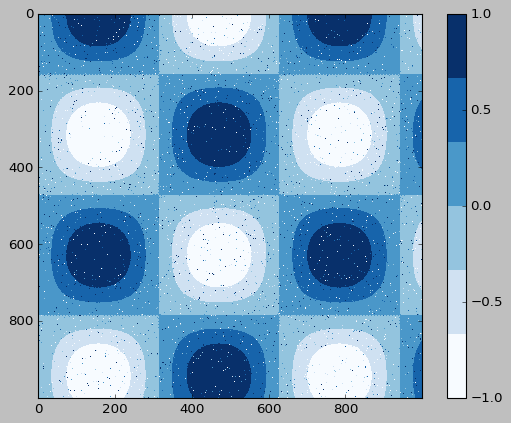

In [41]:
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

이 불연속적 colormap은 기존의 다른 colormap들과 100% 동일하게 사용할 수 있습니다.

## Example: Handwritten Digits

Discrete colorbar를 사용해서 예제 그림을 그려보겠습니다.

scipy.dataset에서는 0부터 5까지의 손으로 쓴 $8 \times 8$ 사이즈의 이미지 2,000개를 모아둔 digits dataset이 있습니다. 

아래와 같은 방식으로 불러올 수 있습니다.

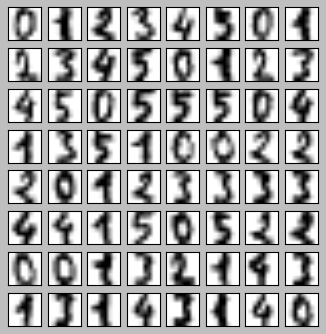

In [42]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(5, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

모든 digit는 각각 64개의 픽셀로 구성되어 있습니다. 다르게 말하자면 64개의 digit는 각각 64 dimensional hyperspace space상에 존재하는 벡터처럼 이해할 수 있습니다. 그리고 각 벡터의 성분은 한 픽셀의 밝기 값이 됩니다.

이러한 64차원 바로 시각화하기는 힘드므로, 2차원으로 차원 축소를 해 보도록 하겠습니다. t-sne같은 여러가지 방법이 있지만, 이번에는 isomap 방식을 사용해 보겠습니다. isomap은 일단 최근접 점들을 graph로 만들고, 이 graph를 hyperplane에 배치하는 방식으로 만들어집니다. 자세한 것은 추후 sklearn을 배우는 시간에 잠시 더 다룰 수 있을 것 같습니다.

In [43]:
# project the digits into 2 dimensions using IsoMap
# Isomap = PCA + MDS
from sklearn.manifold import Isomap 
iso = Isomap(n_components=2) # 2차원으로 축소합니다.
projection = iso.fit_transform(digits.data)

c:\Users\tgkim\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\tgkim\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


``ticks``과 ``clim`` 을 설정해서 colorbar를 조금 더 예쁘게 만들 수 있습니다:

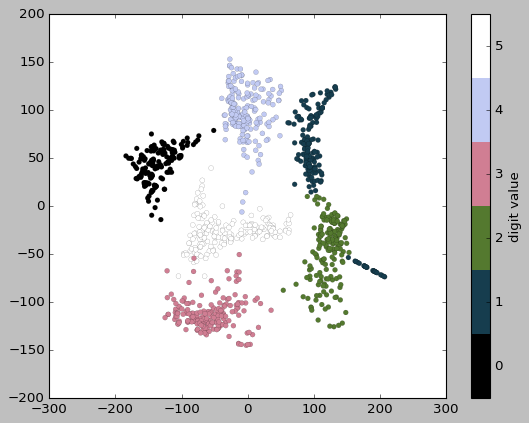

In [44]:
# plot the results
from matplotlib import colormaps as cmap
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap('cubehelix', 6)) # 6개의 구간으로 나눈 discrete map을 생성합니다.
plt.colorbar(ticks=range(6), label='digit value') #tick을 6개로 설정합니다.
plt.clim(-0.5, 5.5) # 전체 범위를 -0.5 에서 5.5까지로 제한합니다.

이러한 프로젝션을 통해서 다양한 정보를 알 수 있습니다. 예를 들자면 몇몇 경우에 5와 3, 그리고 2와 1의 점들이 겹치는 것을 볼 수 있습니다. 
즉 다르게 말하자면, 가끔 손으로 쓴 5와 3, 그리고 2와 1은 구분하기 힘든 경우가 생기는 것 같습니다. 

그 이외에 0과 1같은 경우는 매우 거리가 멉니다. 즉, 매우 명확하게 구분할 수 있습니다. 그래서 5와 3이나 2와 1은 classification task에서 에러가 서로 많이 발생할 확률이 높지만, 0과 1은 그런 문제가 없을 것입니다. 실제로 5와 3을 손으로 써 보시고, 1과 0을 써 보세요. 여러분의 글씨체는 명확하게 구분이 되나요?

# Multiple Subplots

지금까지는 한 개의 그래프를 그리는 방법에 집중했다면, 이번에는 한번에 여러개의 panel이 있는 그래프를 그리는 방법에 대해서 이야기 해 보겠습니다. 

Matplotlib은 subplot이라는 개념을 가지고 이 문제를 접근합니다. subplot은 전체 figure보다 작거나 같은 크기의 axes들이 한 figure안에 존재할 수 있께 하는 것입니다.

지금부터 이러한 subplot에 대해서 공부해보겠습니다. 

In [45]:
plt.style.use('seaborn-v0_8-white') # seaborn-white 스타일을 쓰겠습니다.

## ``plt.axes``: Subplots by Hand

axes를 만드는 가장 간단한 방법은``plt.axes``를 사용하는 것입니다. 아무런 파라미터를 입력하지 않는다면 기본적으로 ``plt.axes``는 figure 전체를 채우는 axes를 만들어 줍니다. 


작은 크기의 axes를 만드는 경우에는 ``[left, bottom, width, height]`` 형태의 리스트를 parameter로 넣어주면 됩니다.
예를 들어서 오른쪽 위에 작은 inset axes를 만들고 싶을 때는 아래처럼 하면 됩니다. 
*left* 와 *bottom* 값인 0.65 는 그래프가 전체의 65%인 점에서 시작한다는 것을 의미합니다. 그리고 뒤의 *width*와 *height*는 그래프가 전체의 20% 크기라는 것을 의미합니다.

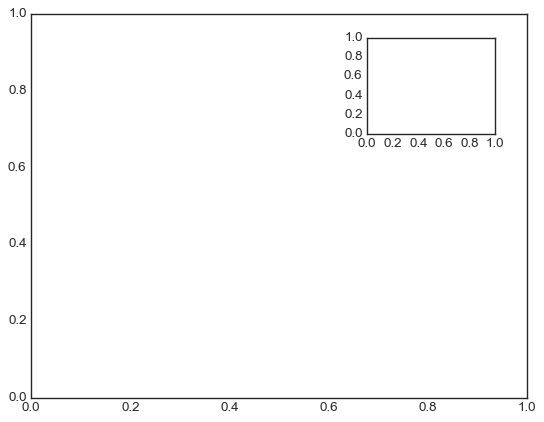

In [63]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

이것과 동일한 object oriented 함수는 ``fig.add_axes()`` 입니다. 
같은 크기의 위아래로 붙은 axes 두 개를 만들어 봅시다.

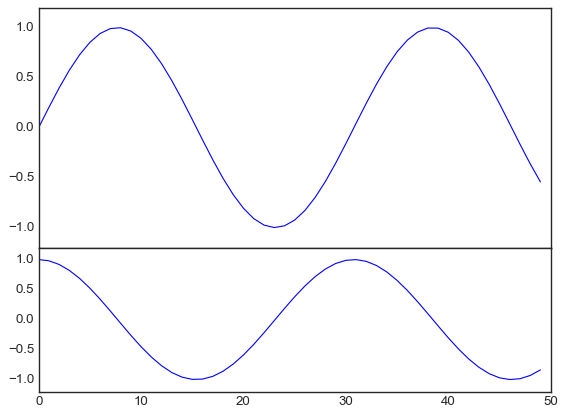

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.4, 0.8, 0.5], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.3], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

두 axes가 붙어있는 것을 알 수 있습니다. 위쪽 panel은 0.5에서 시작하고, 아래쪽 panel의 맨 위는 0.1에서 시작해 0.4만큼을 더해 0.5로 두 위치가 동일합니다.

## ``plt.subplot``: Simple Grids of Subplots

위와 다르게 index 기반의 aligned subplot을 만들 수도 있습니다. ``plt.subplot()``은 그리드 안에 있는 한 개의 subplot을 만들어 줍니다. 3개의 정수 파라미터를 받는데, ``(number of rows, number of columns, index of subplot)`` 순서입니다.

subplot의 index는 좌측 상단부터 우측 하단까지 순서대로 증가합니다.

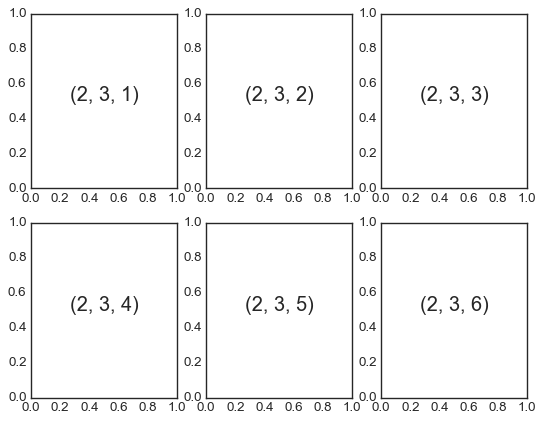

In [48]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

위의 subplot을 보면 서로 너무 붙어있어서 답답한 느낌을 줍니다. ``plt.subplots_adjust`` 함수를 통해서 공간을 조정할 수 있습니다. 
더불어 ``plt.subplot()``과 동일한 object oriented function은 ``fig.add_subplot()`` 입니다.

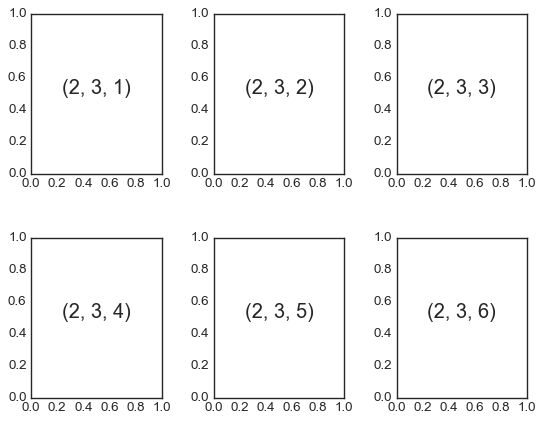

In [49]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

``hspace``와 ``wspace`` arguments를 통해 subplot의 사이즈를 기준으로 얼마나 subplot 사이를 띄울지를 결정할 수 있습니다. 위의 예에서는 subplot의 width와 height의 40%를 띄우게 되어 있습니다.

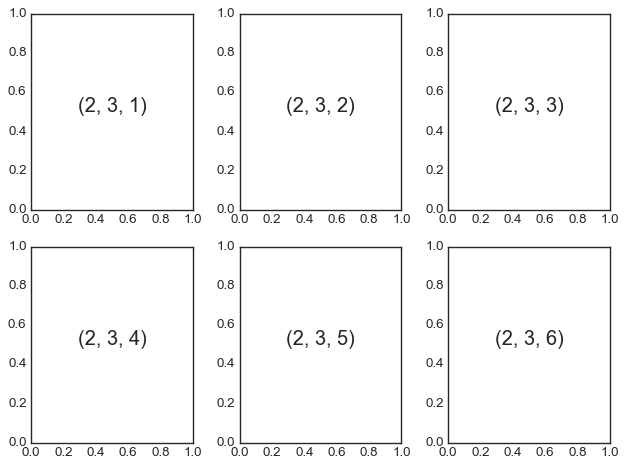

In [50]:
fig = plt.figure()
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
fig.tight_layout()

혹은 간격을 자동으로 조정해주는 ``plt.tight_layout()`` / ``fig.tight_layout()`` 함수도 있습니다. 

## ``plt.subplots``: The Whole Grid in One Go

그런데 위의 방식으로는 grid의 매 axes 하나하나를 일일히 추가해야 하므로 나누는 갯수가 많아지면 많아질수록 비효율적이 됩니다.
그래서 이런 경우에는 ``plt.subplots()`` 를 사용할 수 있습니다. (위의 함수와 다르게 ``s`` 가 붙어있음을 유의해주세요). 

이 함수는 한 개의 subplot을 만들어 주는 것이 아니라, 전체의 grid subplot을 한 번에 만들어 줍니다. 

subplots는 row의 수와 column의 수를 인자로 받습니다. 또 ``sharex``와 ``sharey``라는 arguments를 추가적으로 쓸 수 있습니다. 

$2 \times 3$ subplot을 만들어 봅시다.

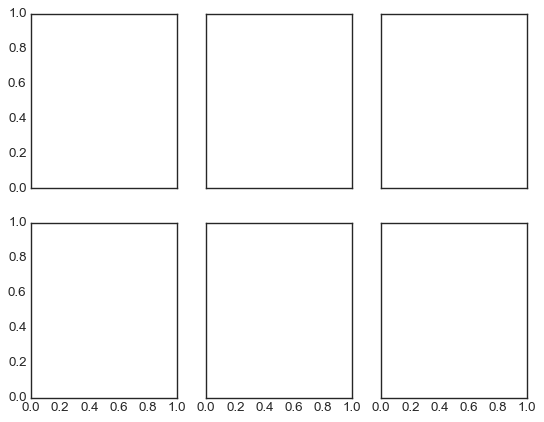

In [51]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

``sharex``와 ``sharey``를 통해서 어떤 축을 공유할 지를 설정할 수 있습니다. 만약 같은 scale의 축을 쓴다면 중복되는 축을 없애서 그림을 더 깔끔하게 만들 수 있겠지요. 

더불어서 return값 중 두 번째 값은 ax는 numpy array입니다. 즉, numpy array의 index notation을 통해서 직접 접근이 가능합니다.

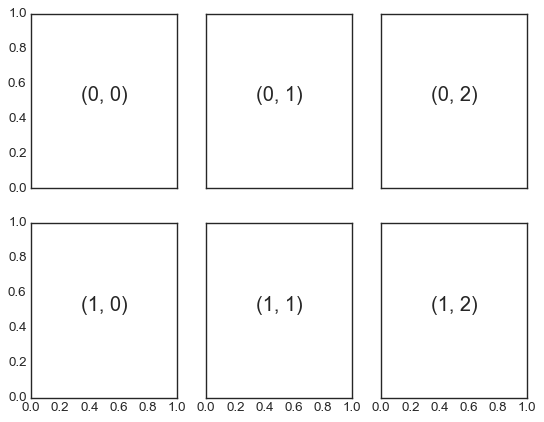

In [52]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

``plt.subplot()``에 비해서 ``plt.subplots()``이 가지는 장점 중 하나는 index가 0부터 시작한다는 것입니다. ``plt.subplot()``은 index가 1 부터 시작하죠.

## ``plt.GridSpec``: More Complicated Arrangements

만약 서로 다른 크기의 subplot들을 조합하고 싶다면 어떤 방법을 써야할까요?

물론 위의 방법들을 통해서도 어느정도 가능하겠지만, 가장 편리하고 효율적인 방법은 ``plt.GridSpec()``을 사용하는 것입니다.

``plt.GridSpec()`` object는 plot을 바로 만들어주지는 않습니다. 대신 `plt.subplot()`의 복잡한 옵션을 조금 편하게 사용할 수 있는 interface를 제공해 줍니다.

In [66]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)  

그리고 `plt.subplot()`의 각 그림이 어느 범위의 grid를 사용할지를 정해서 인자로 넣어줍니다. 

<Axes: >

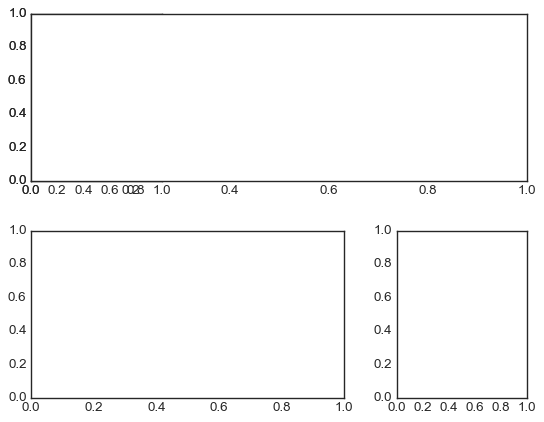

In [73]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, :])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

이런 방식으로 grid를 setting한다면 다양한 장점이 있습니다.
예를 들어서 multi-axes histogram과 함께 각 축의 분포를 보여주는 아래와 같은 분포를 그릴 수 있습니다.

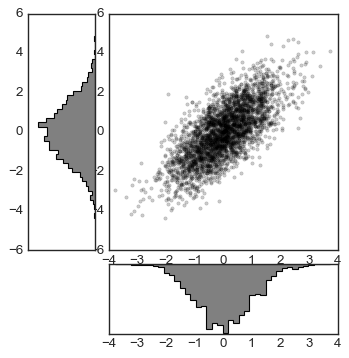

In [55]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(5, 5))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:]) # grid의 순서는 맨 위 좌측부터
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

사실 이러한 그림은 뒤에 배울 seaborn을 통해 더 쉽게 그릴 수 있습니다.

# Text and Annotation

좋은 시각화는 보는 사람이 그림에서 충분한 정보를 읽고 그 목적을 확실하게 이해하게 하는 것입니다.
때떄로는 단순히 그래프와 점들만으로는 충분한 정보를 줄 수 없을 때가 있습니다.
그런 때는 정보를 위한 텍스트를 추가하는 것이 좋은 선택일 수 있습니다.

가장 기본적인 text와 annotation은 label과 title, 그리고 legend 일 것입니다.
그 이외에도 별도의 텍스트를 추가할 수 있습니다.

In [56]:
import matplotlib as mpl # mpl 패키지를 불러옵시다.
plt.style.use('seaborn-v0_8-white') 

## Example: Effect of Holidays on US Births

미국에서 각 날짜에 태어난 사람의 수를 기록한 `data/births.csv` 파일을 불러와 봅시다. 

쉽게 요약하자면 아래의 pivot은 모든 연도의 평균을 내어 각 날짜마다 태어난 아이의 수를 세는 것입니다. 

In [74]:
from datetime import datetime

births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') 
# 너무 큰 에러 데이터는 제거해 줍니다.
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]

<Axes: >

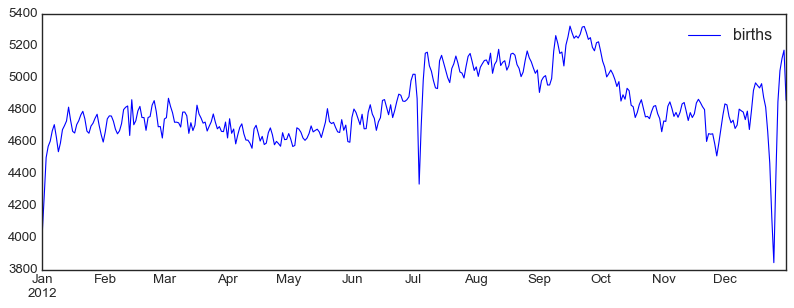

In [76]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

이런 데이터에서 수치가 갑자기 떨어지는 지점들이 무엇일까요? 이 그래프 만으로는 잘 알 수 없습니다. 

``plt.text``/``ax.text`` command를 통해서 특정한 위치에 텍스트를 추가할 수 있습니다. 

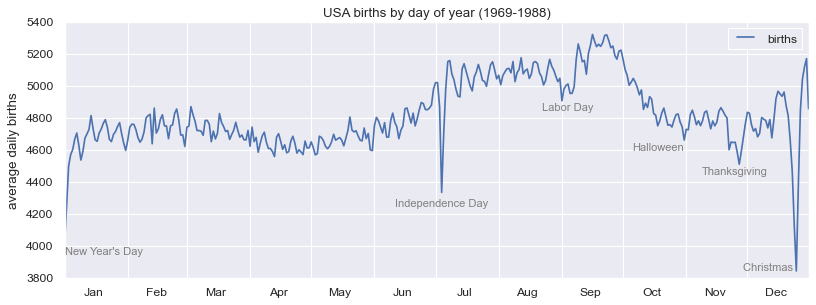

In [110]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray') # 이런 형태로 style을 dict 형태로 인자로 넘겨줄 수 있습니다.
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

``ax.text`` method는 (x 위치, y 위치, string)를 기본 인자로 받습니다. 그리고 color, size, style, alignment등을 추가적인 keyword arguments로 받습니다. 위에서 우리는 ``ha='right'`` ``ha='center'``를 사용했습니다. 여기서 ``ha`` 는 *horizontal alignment*의 약자입니다.

``help(plt.text())``와 ``help(mpl.text.Text())``을 통해서 docstring을 확인해 보세요.

## Transforms and Text Position

위의 예시에서는 text의 위치를 data위치값을 통해서 지정했습니다. 하지만 때로는 데이터값에 무관하게 axes나 figure 전체를 기준으로 위치를 지정하는 것이 더 적절한 경우도 많습니다. 이 경우를 위해서 matplotlib은 *transform* 옵션을 통해 이 위치를 변경할 수 있게 합니다. 

일반적으로는 아래의 3가지 정도를 사용하면 됩니다.

- ``ax.transData``: 데이터값을 기준으로 함.
- ``ax.transAxes``: axis를 기준으로 함 
- ``fig.transFigure``: figure를 기준으로 함

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

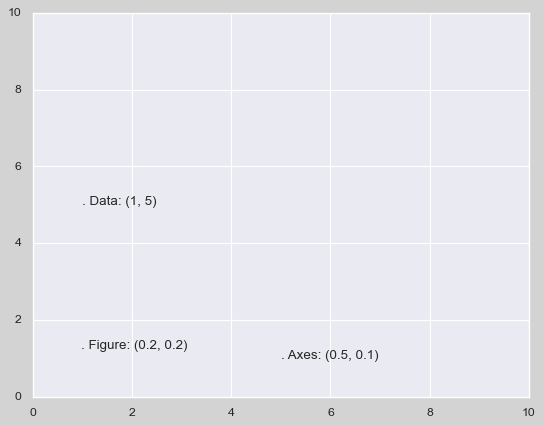

In [111]:
fig, ax = plt.subplots(facecolor='lightgray') #fig 영역과 axes 영역을 구분해줍니다
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

기본적으로 text align은 left로 되어 있습니다. 그러므로 각 text의 .은 각 text의 정확한 기준점을 의미합니다. 

``transData`` 좌표는 x와 y의 범위가 변하면 그 위치가 변합니다. 
``transAxes`` 는 경우 axes의 좌측 하단을 (0, 0) 우측 상단을 (1, 1)로 해서 상대적인 위치를 계산해 줍니다. 이 그림에서는 "흰색 박스"가 axes의 영역입니다. 
``transFigure``도 유사합니다, 하지만 figure 전체에서 좌측 하단을 (0, 0)으로 우측 상단을 (1, 1)로 두고 계산합니다. 이 그림에서는 "회색 박스"와 "흰색 박스" 전체가 figure의 영역입니다.

만약 x와 y축의 범위를 바꾸면 ``transData`` 만 영향을 받습니다

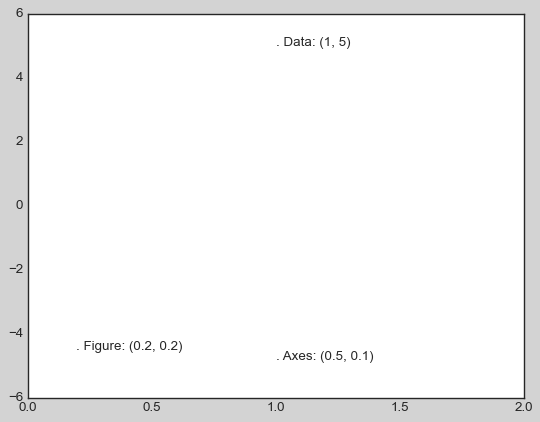

In [79]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

때로는 text와 함께 화살표를 이용하면 더 효율적인 시각화가 가능합니다.

하지만 Matplotlib에서 화살표를 그리는 것은 단순하지 않습니다. ``plt.arrow()`` 라는 함수가 존재하지만, 이 함수에서 만들어지는 화살표는 SVG object로 그림의 비율이나 해상도에 따라 조금씩 달라집니다. 

대신 ``plt.annotate()`` function을 사용하면 여러가지 화살표를 예쁘게 그릴 수 있습니다. 

Text(2, -6, 'local minimum')

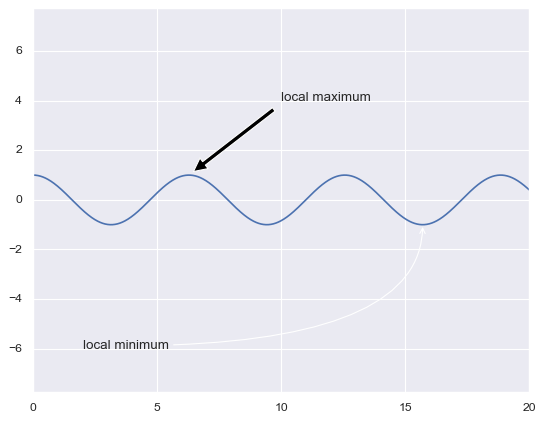

In [117]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

Arrow의 style은 ``arrowprops`` dictionary을 통해 지정해 줍니다. Matplotlib의 online documentation에 자세한 설명들이 있으니, 이 강의에서 모두 다루는 것 보다는 필요한 시기에 찾아보시는 것을 권장합니다.

대신 이 강의에서는 몇 가지 예시를 보여드리겠습니다.

In [81]:
%%capture

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

In [82]:
ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

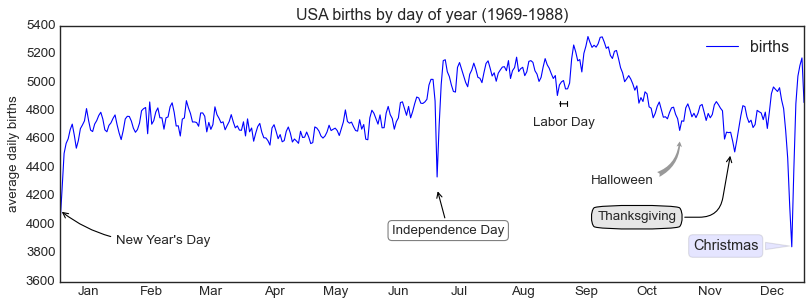

In [83]:
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')
 
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);
fig

화살표와 텍스트 상자의 형태를 꽤나 자유자재로 바꿀 수 있다는 것을 알 수 있습니다. 

하지만 이런 기능은 수동으로 일일히 조정해줘야 하므로, 원하는 대로 만드는 데는 꽤 많은 시간이 들어갑니다.

# Visualization with Seaborn
지금까지 배운 Matplotlib의 기능이 매우 다양하지만, 사실 그렇게 사용자 친화적이지는 않고 사용이 만족스럽지 않은 경우도 많습니다. 

예를 들면 아래와 같은 문제들이 있습니다. 

- 2.0 버전 이전의 Matplotlib의 기본 plot들은 예쁘지 않고 시각화 결과가 좋지 않습니다. 이는 기본적으로 MATLAB의 시각화 툴을 흉내내기 위해 만들었기 때문입니다. MATLAB의 시각화 툴은 1999년 (20세기!!)에 만들어졌습니다.
- low-level api를 제공하기 때문에, 다양한 시각화를 할 수 있지만 보통 사람의 손을 많이 타고 코드가 길어집니다.
- 데이터 분석에 Pandas / dask 등이 널리 사용되고 있습니다만, matplotlib은 pandas보다도 꽤 먼저 만들어 졌습니다. 그래서 ``DataFrame``을 사용하기에 최적화 되지 않았습니다. 즉, 모든 경우에 일단 ``DataFrame``의 각 column을 ``Series``로 추출해 사용해야 합니다. 



물론 Matplotlib도 많은 개선이 이루어졌습니다. 예를 들어 최근 ``plt.style``이라는 툴이 도입되어 훨씬 자연스럽게 pandas등을 사용할 수 있습니다. 

하지만 더욱 간편하게 이런 것들을 개선하기 위해서 [Seaborn](http://seaborn.pydata.org/)이라는 라이브러리를 사용할 수 있습니다. 

## Seaborn Versus Matplotlib

Maplotlib으로 그림을 그리는 것과 Seaborn으로 그리는 것의 차이를 보여주는 것은 실제 코드를 보는 것이 가장 효율적입니다. Random walk는 시간에 따라서 agent가 현재 위치에서 임의의 이웃한 칸으로 이동하는 것을 의미합니다. Random walk 그래프를 한 번 그려봅시다.

In [118]:
import matplotlib.pyplot as plt
plt.style.use('classic')

Random Walk data를 만들어 봅시다.

In [119]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

그리고 가장 단순한 그림을 그려봅시다.

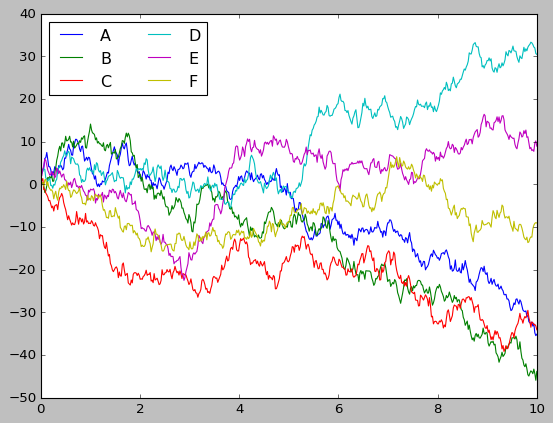

In [86]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

우리가 원하는 정보는 이 그림에 모두 들어있기는 합니다. 그런데 사실 그리 예쁘지 않습니다. 2021년에 그렸다기에는 조금... 

이제는 seaborn style의 그림을 그려봅시다. 

seaborn은 자체적으로 그림을 그리기 위한 high-level 도구들을 제공합니다. 더불어서 seaborn 자체가 matplotlib에 기반하고 있으므로, seaborn을 사용하는 자체로 현재 시각화중인 그림의 기본 파라미터를 ``set()`` methods를 통해서 seaborn 스타일로 바꿀 수 있습니다. 

일반적으로 seaborn은 `sns`라는 이름으로 import 니다.

In [120]:
import seaborn as sns
sns.set()

위와 동일하게 plot을 해 봅시다.

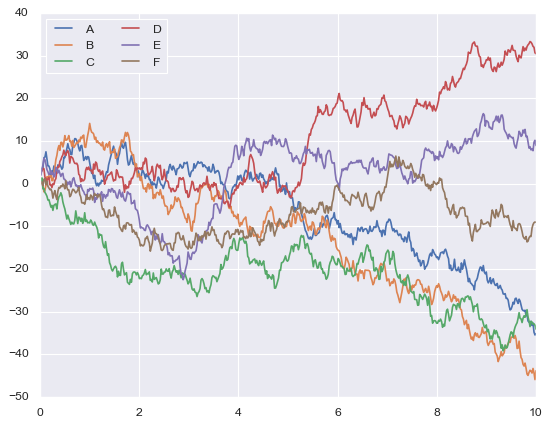

In [128]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

훨씬 보기 좋습니다.

## Exploring Seaborn Plots

Seaborn은 주로 matplotlib의 복잡한 low-level interface를 사용하지 않고, high-level command를 통해서 쉽게 시각화를 하게 해 주기 위해 씁니다. 

몇가지 예제를 통해서 seaborn이 어떤 형태로 작동하고, 얼마나 편리한지 확인해 봅시다. 물론 아래의 모든 그림은 기본적으로 matplotlib만으로도 그릴 수 있습니다. 다만 seaborn으로 그리는 것이 훨씬 간편합니다.

### Histograms, KDE, and densities

통계분석을 할 때 가장 자주 하는 시각화중 하나는 hitogram과 kernel density estimation 입니다.

지난 시간에 matplotlib으로도 쉽게 histogram을 그릴 수 있는 것을 공부했습니다.

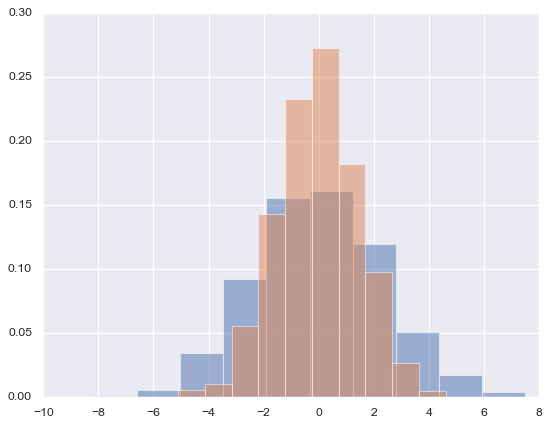

In [89]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

지난 시간에는 kde를 하기 위해서 별도로 scipy를 불러왔습니다. 하지만 seaborn은 자체 method인 ``sns.kdeplot``을 사용 가능합니다.

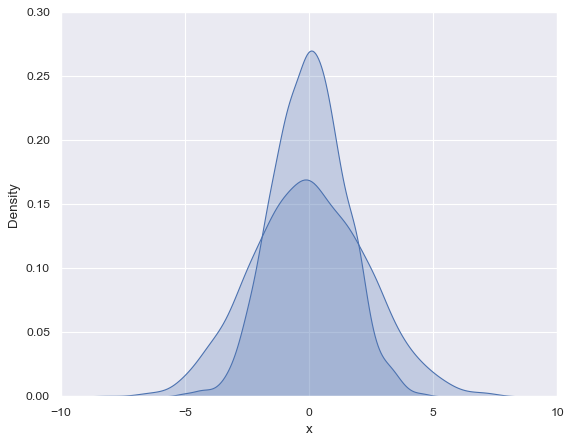

In [90]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

<Axes: xlabel='x', ylabel='Density'>

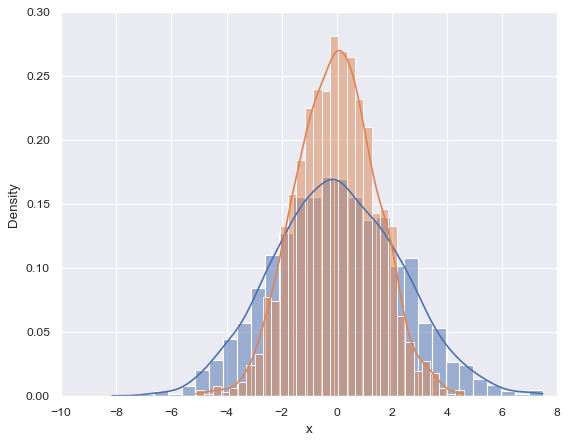

In [129]:
# 아래처럼 한 번에 그릴 수도 있습니다
sns.histplot(data['x'], kde=True, stat="density")
sns.histplot(data['y'], kde=True, stat="density")

심지어는 2 dimension dataset도 ``kdeplot``을 통해서 그릴 수 있습니다. 기본 설정은 contour plot을 그려줍니다.

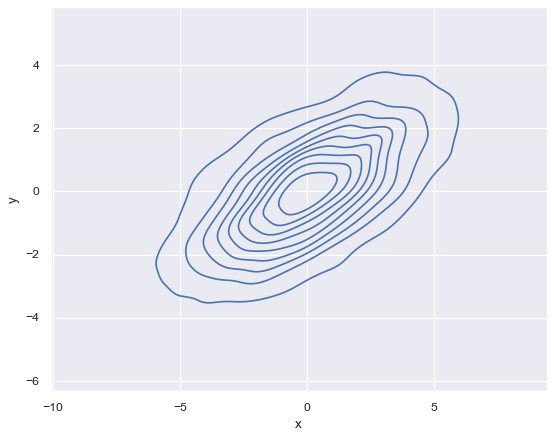

In [92]:
sns.kdeplot(x=data['x'], y=data['y']);

또한 joint distribution과 각 축의 marginal distribution을 함께 시각화 할 수 있습니다.
지난 시간에 scatter와 gridspec으로 복잡하게 구현했는데, seaborn은 ``sns.jointplot`` 명령어 한 개로 그릴 수 있습니다. 

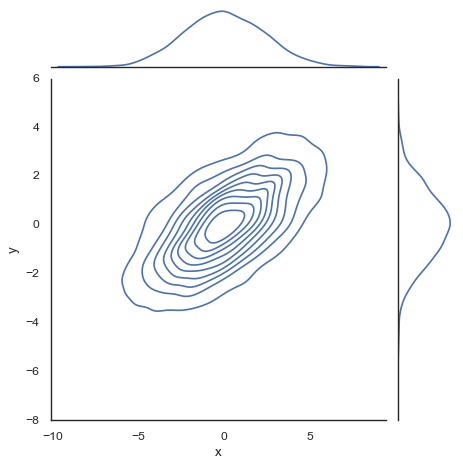

In [93]:
with sns.axes_style('white'): # 배경을 흰 색으로 바꿉니다.
    sns.jointplot(data, x="x", y="y", kind='kde');

``jointplot``을 사용해 kde 이외에도 hexplot등 다른 형태의 시각화도 가능합니다.

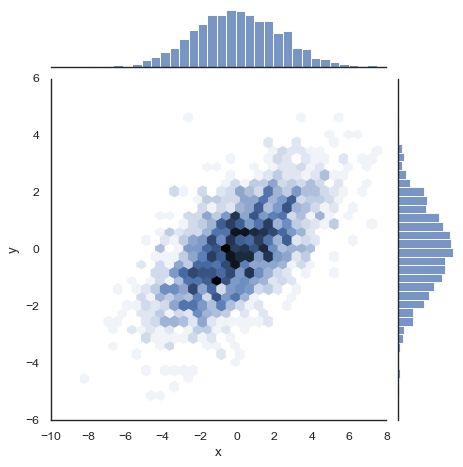

In [94]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='hex')

### Pair plots

더 큰 차원에서 joint distribution에 대한 분석을 하고 싶다면 어떻게 해야 할까요? 이런 경우에는 seaborn의 *pair plots* 기능을 사용하면 됩니다.
지난 시간에 사용했던 iris 데이터를 다시 가져와 봅시다. 

In [95]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4가지 feature가 있습니다. 각 feature들 사이의 관계를 보고싶다면 아주 쉽게 ``sns.pairplot``을 사용하면 됩니다. 

더불어서 *hue*옵션을 통해 색상을 지정해 줄 수 있습니다.

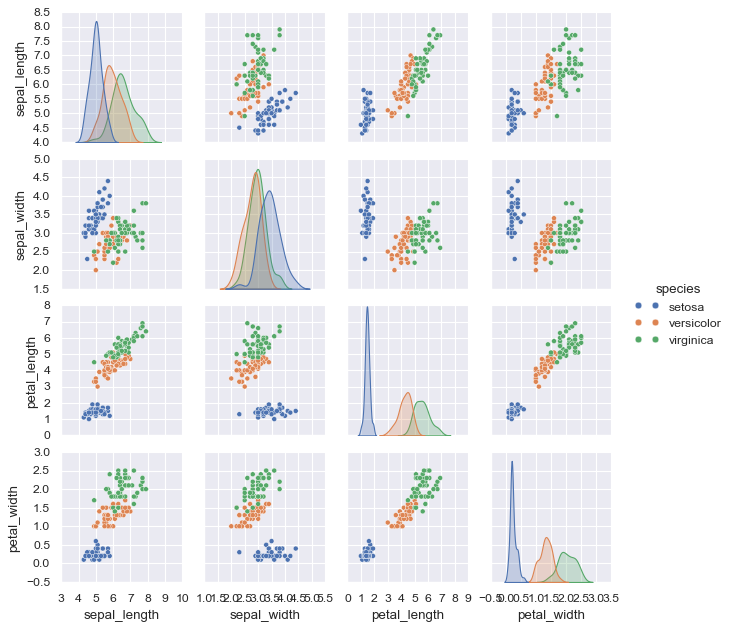

In [96]:
sns.pairplot(iris, hue='species', height=2);

### Faceted histograms

때떄로는 데이터 분석을 위해 어떤 subset에 대한 시각화를 하는 것이 중요할 수 있습니다. 임의의 subset에 대해서 그림을 그리기 위해서는 ``FacetGrid``라는 함수를 사용하면 됩니다. 

tips dataset은 아래와 같이 식당에서 tip을 받은 양을 분석한 데이터입니다. 

In [97]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


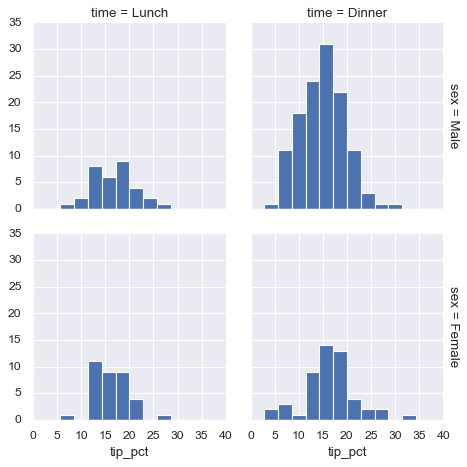

In [98]:
# 팁을 식사 액수의 몇%나 냈는지 통계를 내 봅시다. 
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# 각 row는 음식값을 지불한 성별, column은 점심식사와 저녁식사를 구분해 봅시다
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plot을 통해서 위의 데이터에 대한 추가 분석을 해 볼 수 있습니다. 예를 들어서 요일에 따라서 팁의 금액이 달라질까요?

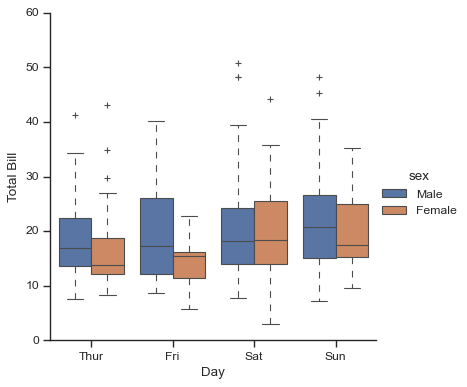

In [99]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

다시 한 번 ``sns.jointplot``을 통해서 dataset을 분석해볼 수도 있습니다. 

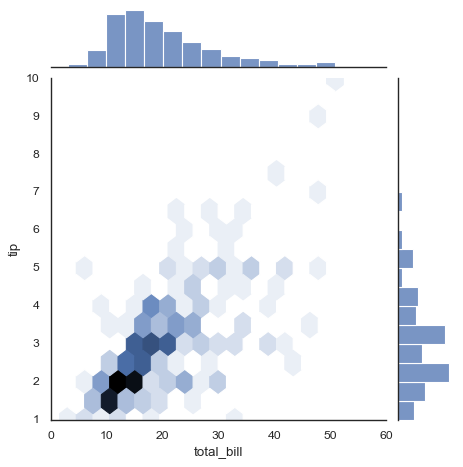

In [100]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

``kind='reg'`` 옵션은 linear regression line과 함께 각 변수의 KDE와 histogram을 같이 보여줍니다.

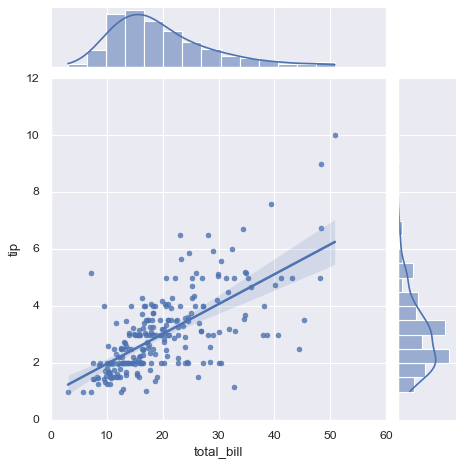

In [101]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar plots

``sns.factorplot``은 시계열 그래프의 시각화도 쉽게 만들어 줍니다.

In [102]:
# Seaborn의 planets 데이터셋을 불러옵시다
planets = sns.load_dataset('planets')
planets.head()
planets["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

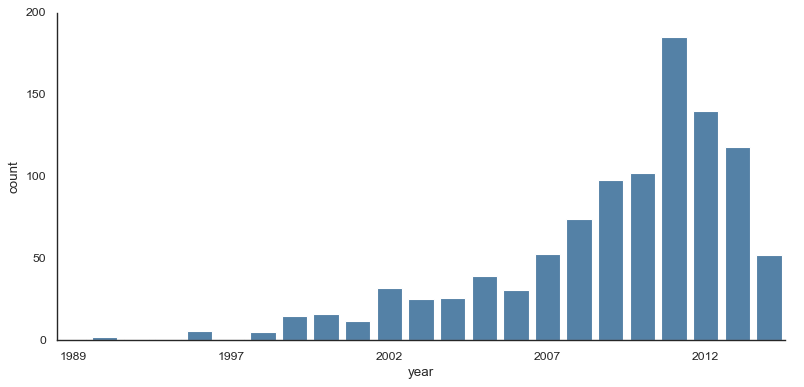

In [103]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

이 planet들을 관측한 방법 (method)에 따라 따로 그리고 싶다면 어떻게 하면 될까요? 이번에도 hue option을 추가해주면 됩니다. 

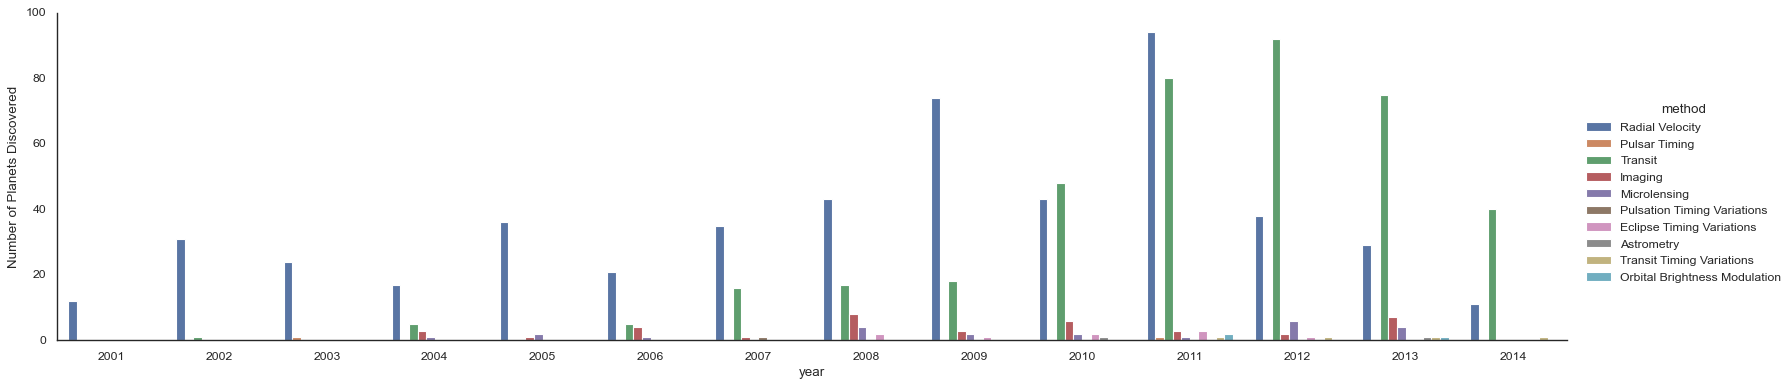

In [104]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

마지막으로 Seaborn을 통해 어떤 식으로 데이터 시각화를 더 쉽게 할 수 있는지 확인해 봅시다. 
Python Data Science Handbook의 저자인 Jake VanderPlas가 업로드해 둔 마라톤 데이터를 다운받아 봅시다. 

In [105]:
#혹시 데이터가 없다면 아래의 스크립트를 실행해 보세요
#!cd data && curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [131]:
data = pd.read_csv('../data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


중간점을 통과한 시간과 최종 결승선을 통과한 시간으로 구성된 데이터입니다. 

pandas는 기본적으로 시간을 python string으로 저장합니다. 

In [132]:
data.dtypes 

age        int64
gender    object
split     object
final     object
dtype: object

이것을 datetime object로 바꾸어 줍시다. converter function을 정의하고, 이것을 read_csve의 인자로 넣어줍니다.

In [135]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [136]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

이제 이 시간을 초 단위로 바꾸어 줍시다. 
integer로 변환하면 기본적으로는 nanosecond 단위이므로, $10^9$으로 나누어 주어야 합니다.

In [137]:
data['split_sec'] = data['split'].astype("int64") / 1E9
data['final_sec'] = data['final'].astype("int64") / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


일단 전체 ``jointplot``을 그려서 분포를 봅시다.

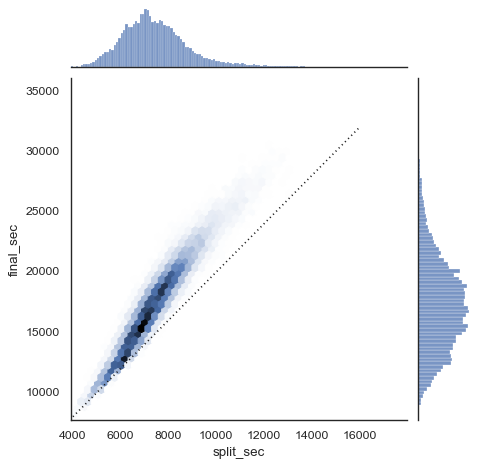

In [138]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

점선은 $f(x) = 2x$ 라인을 나타냅니다. 만약 균일한 페이스로 뛰게 된다면 저 점선과 같은 기울기로 점들이 몰려 나올 것입니다. 하지만 실제로는 점선보다 기울기가 큰 것을 알 수 있습니다. 즉, 후반부 페이스가 더 떨어집님다. 

혹시 후반부에 더 빠른 사람은 없을까요? 전반부에 비해 후반부 페이스가 얼마나 되는지 확인하는 변수를 만들어 `split_frac` column에 저장합시다

In [139]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


이 값이 0보다 작다면 후반부 페이스가 더 좋은 선수입니다.

하지만 대부분의 경우는 아닌 것 같습니다.

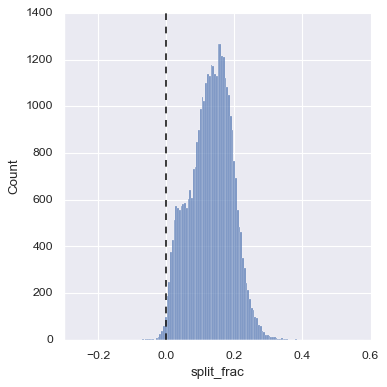

In [140]:
sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [141]:
sum(data.split_frac < 0)

251

4만명 중 단 251명만 이러한 기록을 가지고 있습니다. 

이 split fraction과 다른 variable들의 관계에 대해서 분석해 봅시다. 위에서 배운 ``pairgrid``를 써 봅시다. 

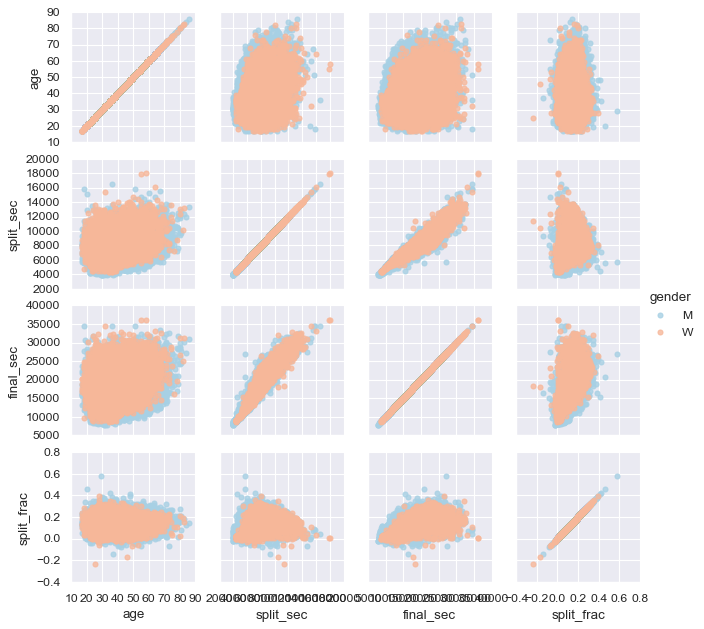

In [142]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r', height=2)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

대부분의 경우는 split_frac과 correlation이 거의 느껴지지 않습니다. 예외적으로 기록이 ``final_sec``과는 약한 correlation이 보입니다. 즉, 기록이 빠른 마라토너가 전체적으로 전후반 페이스 차이가 적습니다. 

남성과 여성은 큰 차이가 느껴지지 않습니다. 
실제로 그런지 histogram을 그려봅시다. 

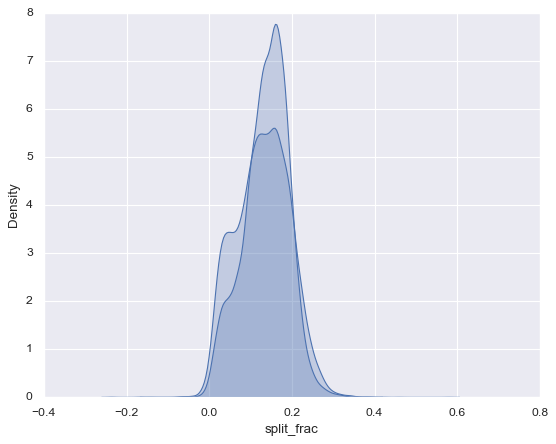

In [143]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

재밌게도 남성이 여성보다 조금 더 균일한 페이스로 뛰는 사람이 많은 것을 볼 수 있습니다 .

남성과 여성 두 가지 모두 두 개의 분포를 겹쳐놓은 것 처럼 보입니다. 
*violin plot*으로 다시 체크해 봅시다. 

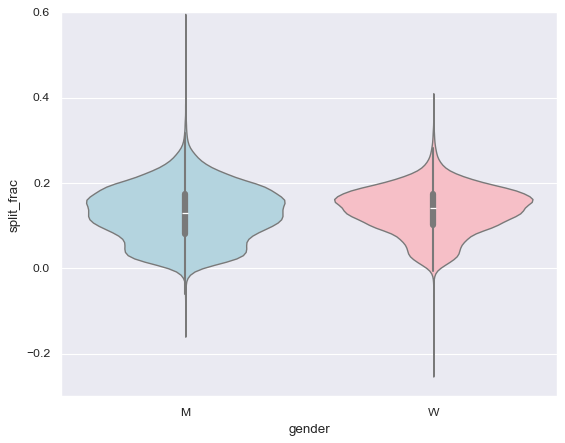

In [144]:
sns.violinplot(x="gender", y="split_frac", hue="gender", data=data, palette=["lightblue", "lightpink"]);

역시나 그렇습니다. 

그렇다면 이 bimodality는 어디서 오는 것일까요? 혹시 나이에서 오는게 아닐까요?
이것을 확인하기 위해 10년씩 자른 나이대 column을 만들어 봅시다.

In [145]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


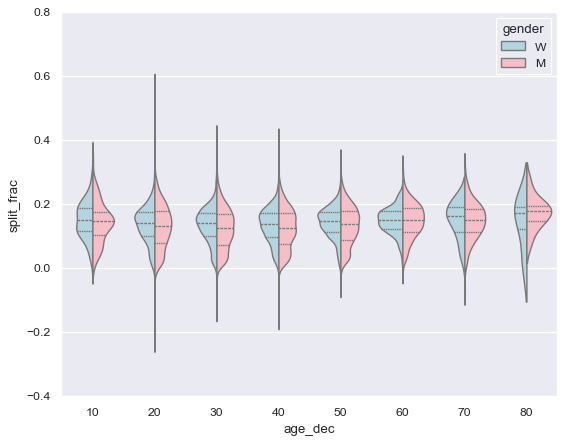

In [146]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile", # split=True 옵션을 주면 두 분포를 옆에 붙여 그립니다.
                   palette=["lightblue", "lightpink"]);

남성과 여성의 분포가 조금 다른 것을 알 수 있습니다. 

20대부터 50대까지는 동일한 나이의 남성이 동일한 나이의 여성보다 상대적인 후반부 페이스가 좋은 것을 알 수 있스빈다. 

80세 이상은 여성이 훨씬 더 후반부 분포가 좋은 것 처럼 보입니다. 하지만 이것은 sample size가 너무 작기 때문일 수 있습니다. 체크해봅시다.

In [147]:
(data.age > 80).sum()

np.int64(7)

``regplot``을 통해서 두 분포의 기울기를 비교해 봅시다. 남성의 기울기가 여성에 비해 가파르게 나옵니다.

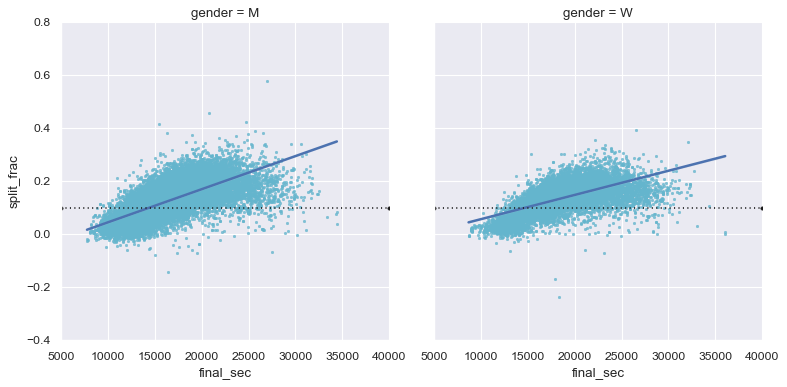

In [148]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

후반부 페이스가 좋은 사람들은 보통 15000초 이전에 결승점에 도착합니다. 즉, 이 사람들은 선수들일 확률이 높죠.

# Further Resources

## Matplotlib Resources

이러한 짦은 두 시간의 강의로 Matplotlib의 모든 기능을 파악하기는 힘듭니다. 

Matplotlib의 [online documentation](http://matplotlib.org/)은 매우 자세히 구성되어 있습니다. 
[Matplotlib gallery](http://matplotlib.org/gallery.html)에 이미 잘 구성된 시각화 예제들이 많습니다. 위 코드를 참조하시는 것도 좋습니다.

책을 하나 읽고 싶다면 [*Interactive Applications Using Matplotlib*](https://www.packtpub.com/application-development/interactive-applications-using-matplotlib)은 Matplotlib의 주 개발자중 하나인 Ben Root가 쓴 책으로 추천할 만 합니다.

[Pega Devlog](https://jehyunlee.github.io/): 한국에너지기술연구원 이제현박사님의 블로그입니다. 멋진 시각화 예제가 많이! 엄청 많이! 있습니다

## Other Python Graphics Libraries

Matplotlib가 가장 유명한 Python 시각화 라이브러리입니다만, 꽤나 빠르게 새로운 라이브러리들이 개발되고 발전하고 있습니다. 더불어서 javascript 기반 라이브러리들은 웹에서의 동적 시각화등에 사용하기 편리합니다. 대표적인 것 몇가지를 예를 들면 아래와 같습니다. 


- [Bokeh] (http://bokeh.pydata.org)는 빅데이터 혹은 스트리밍 데이터를 처리할 수 있는 python frontend를 가진 javascript 라이브러리입니다. 파이썬 프론트엔드는 Bokeh의 JS엔진에서 해석할 수 있는 json파일을 생성해 줍니다. 
- [Plotly] (http://plot.ly)는 plotly에서 만든 오픈 소스 라이브러리로 다양하고 훌륭한 시각화 기능을 보여줍니다. 
- [Vispy] (http://vispy.org/)는 빅데이터의 동적 시각화를 위해 개발된 라이브러립니다. OpenGL을 통한 가속을 수행하므로, 고사양 컴퓨터에서 복잡한 시각화를 하는데 적절합니다. 
- [Vega] (https://vega.github.io/) 및 [Vega-Lite] (https://vega.github.io/vega-lite)또한 생각해볼만 한 라이브러리입니다. [Altair] (https://altair-viz.github.io/) 패키지는 이러한 Vega와 Vega-Lite의 Python API 입니다.

# Today
- Legends
- Colorbars
- Subplot
- Text / Annotation
- Ticks
- Seaborn